In [1]:
%load_ext autoreload

from spikesorting.utils import plot_traces
from spikesorting.utils import load

import matplotlib.pyplot as plt

# Custom plotting library
import joli
plt.style.use('white')
plt.rcParams['figure.dpi'] = 140

# Loading data

## Spyking Circus data
Link: https://zenodo.org/records/1205233#.WrQEpnXwaV4

BinaryRecordingExtractor: 256 channels - 20.0kHz - 1 segments - 6,000,003 samples 
                          300.00s (5.00 minutes) - int16 dtype - 2.86 GiB
  file_paths: ['C:\\Users\\roque\\Desktop\\These\\Travail\\Codes\\SpikeSorting\\data\\spyking_circus\\20160415\\patch_2_MEA.raw']


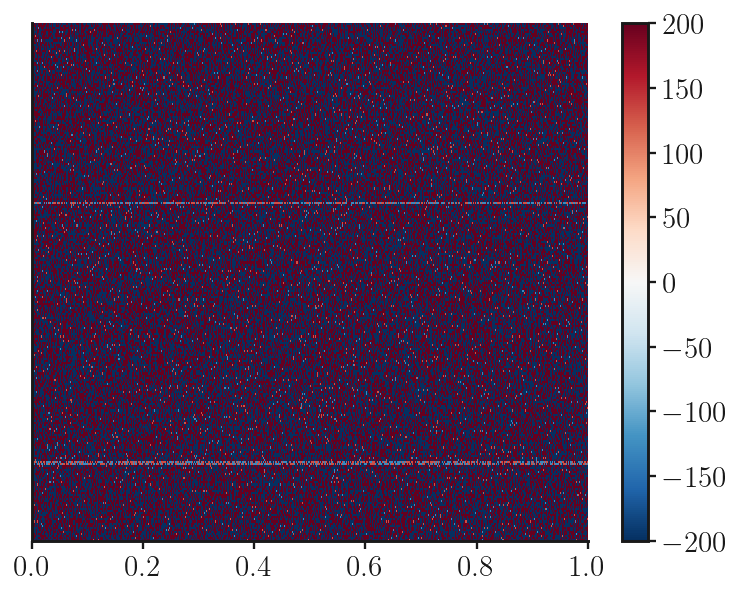

In [16]:
%autoreload
datapath = f'spyking_circus/20160415/patch_2_MEA.raw'
probepath = f'spyking_circus/mea_256.prb'

recording = load(datapath, probepath)
plot_traces(recording, time_range=(0, 1))

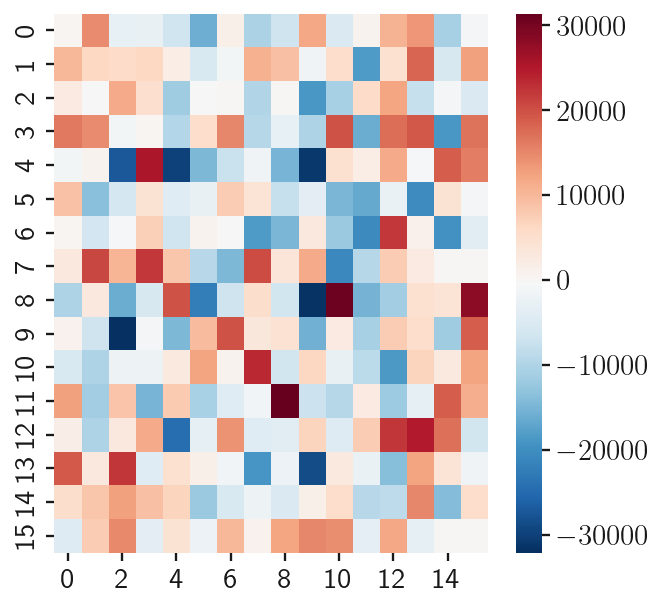

In [15]:
import seaborn as sns
import numpy as np

_, ax = plt.subplots(figsize=(5, 5))

start = 20000
end = 20100
traces_raw = recording.get_traces(
    start_frame=start, 
    end_frame=end
)

# Add missing channels due to stimulation electrodes
traces = np.zeros((100, 256))
traces[:, :126] = traces_raw[:, :126]
traces [:, 128:254] = traces_raw[:, 126:]

traces = np.reshape(traces, (100, 16, 16))
sns.heatmap(traces[25, :, :], cmap='RdBu_r')
plt.show()

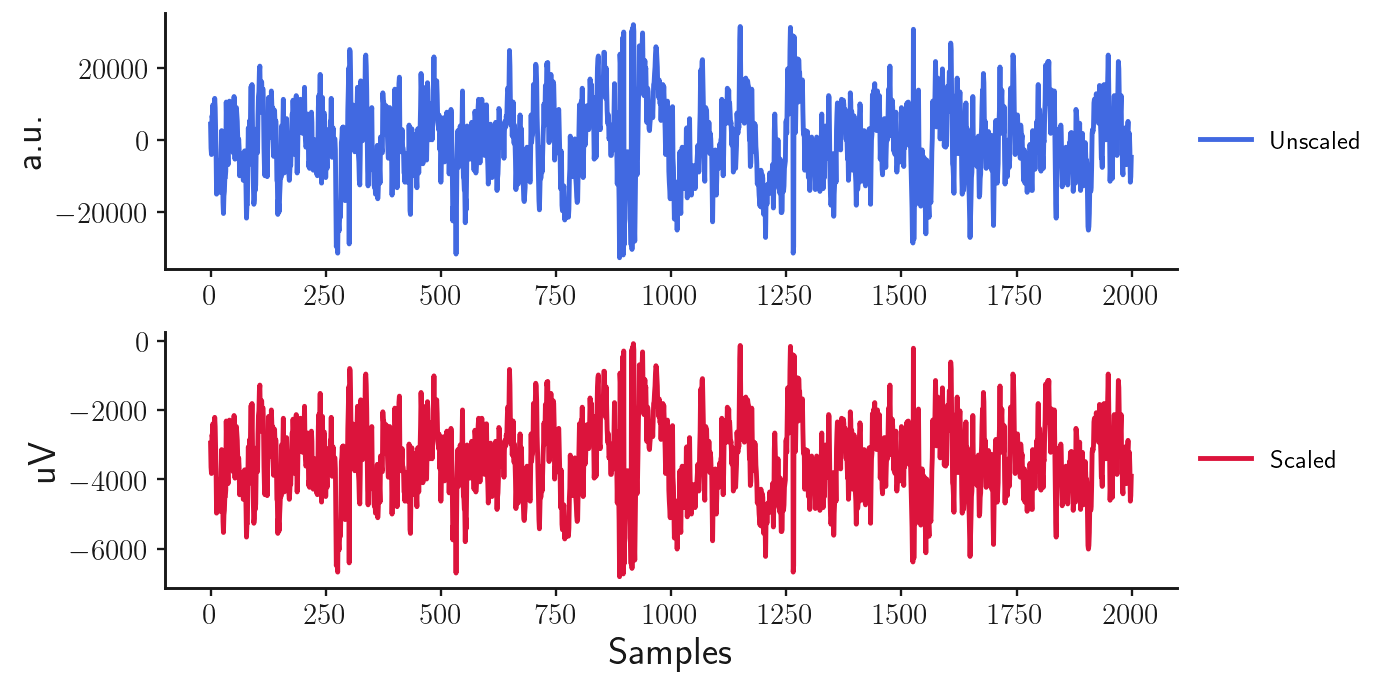

In [14]:
_, axes = plt.subplots(2, 1, figsize=(10, 5))

start = 20000
end = 22000
traces_unscaled = recording.get_traces(
    return_scaled=False, 
    start_frame=start, 
    end_frame=end
)
traces_scaled = recording.get_traces(
    return_scaled=True,
    start_frame=start, 
    end_frame=end
)

axes[0].plot(traces_unscaled[:, 0], label='Unscaled', c='royalblue')
axes[1].plot(traces_scaled[:, 0], label='Scaled', c='crimson')
for ax in axes:
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13)
axes[0].set_ylabel('a.u.')
axes[1].set_ylabel('uV')
axes[1].set_xlabel('Samples')

plt.tight_layout()
plt.show()

## Sample data
https://www.multichannelsystems.com/software/cmos-mea-tools

BinaryRecordingExtractor: 4225 channels - 25.0kHz - 1 segments - 75,012 samples - 3.00s 
                          int16 dtype - 604.49 MiB
  file_paths: ['C:\\Users\\roque\\Desktop\\These\\Travail\\Codes\\SpikeSorting\\data\\sample\\test_data.cmcr']


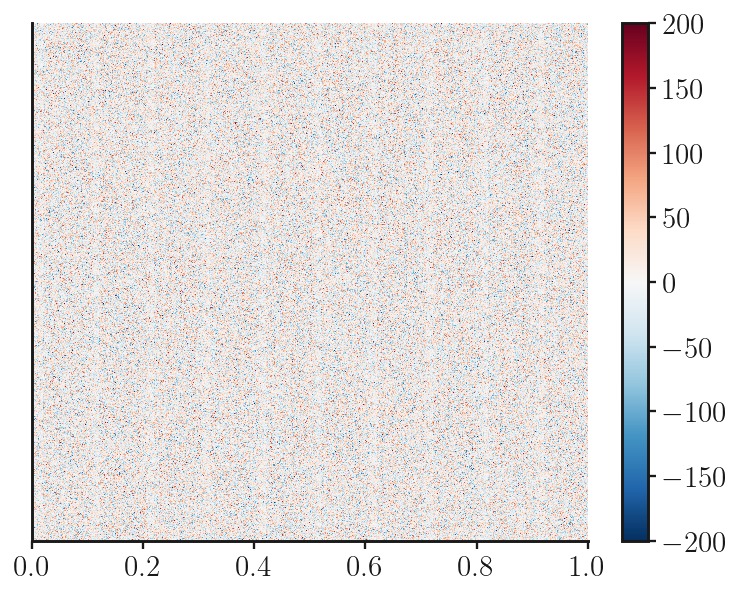

In [110]:
import spikeinterface.extractors as se

recording = se.read_binary(
    "C:/Users/roque/Desktop/These/Travail/Codes/SpikeSorting/data/sample/test_data.cmcr", 
    sampling_frequency=25000, 
    num_channels=4225,
    dtype="int16"
)

print(recording)
plot_traces(recording, time_range=(0, 1))

<Axes: >

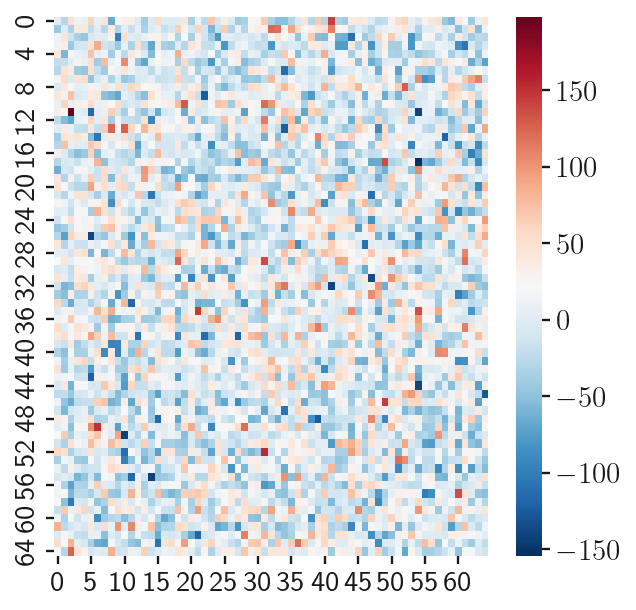

In [115]:
import seaborn as sns
import numpy as np

_, ax = plt.subplots(figsize=(5, 5))

start = 20000
end = 20100
traces_raw = recording.get_traces(
    start_frame=start, 
    end_frame=end
)

traces = np.reshape(traces_raw, (100, 65, 65))
sns.heatmap(traces[0, :, :], cmap='RdBu_r')
plt.show()

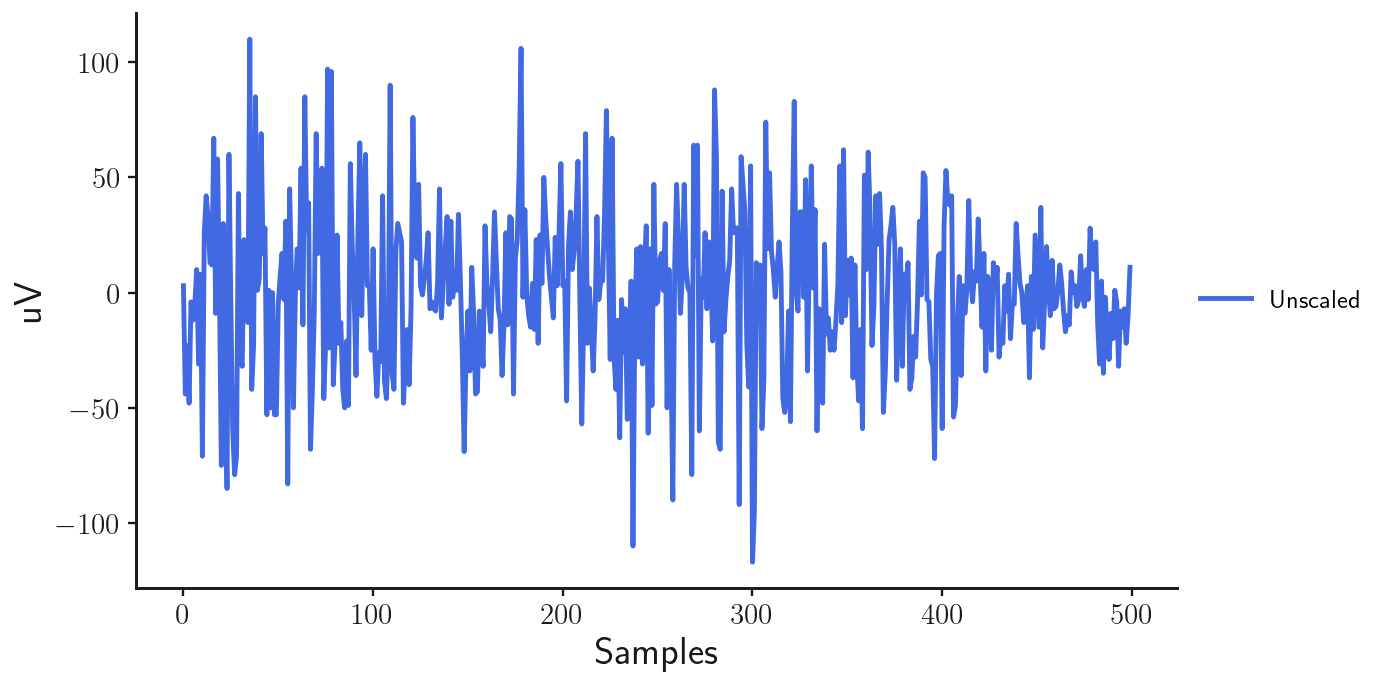

In [117]:
_, ax = plt.subplots(figsize=(10, 5))

start = 20000
end = 20500
traces_unscaled = recording.get_traces(
    return_scaled=False, 
    start_frame=start, 
    end_frame=end
)

ax.plot(traces_unscaled[:, 0], label='Unscaled', c='royalblue')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13)
ax.set_ylabel('a.u.')
ax.set_ylabel('uV')
ax.set_xlabel('Samples')

plt.tight_layout()
plt.show()

# Get sorters

In [14]:
from spikesorting.utils import get_sorters, run_sorters

In [15]:
%autoreload
sorters = get_sorters()

Parameters for herdingspikes:
Herding Spikes is a density-based spike sorter designed for high-density retinal recordings.
    It uses both PCA features and an estimate of the spike location to cluster different units.
    For more information see https://doi.org/10.1016/j.jneumeth.2016.06.006
{'clustering_bandwidth': 'Meanshift bandwidth, average spatial extent of spike clusters (um)', 'clustering_alpha': 'Scalar for the waveform PC features when clustering.', 'clustering_n_jobs': 'Number of cores to use for clustering.', 'clustering_bin_seeding': 'Enable clustering bin seeding.', 'clustering_min_bin_freq': 'Minimum spikes per bin for bin seeding.', 'clustering_subset': 'Number of spikes used to build clusters. All by default.', 'left_cutout_time': 'Cutout size before peak (ms).', 'right_cutout_time': 'Cutout size after peak (ms).', 'detect_threshold': 'Detection threshold', 'probe_masked_channels': 'Masked channels', 'probe_inner_radius': 'Radius of area around probe channel for loca

# Run sorters

In [18]:
import spikeinterface.sorters as ss

detection = {
    'peak_sign': 'neg', 'detect_threshold': 8
}
sorter = 'spykingcircus2'
ss.run_sorter(
    sorter_name=sorter,
    recording=recording,
    output_folder=f"temp/{sorter}",
    remove_existing_folder=True,
    detection=detection, # Custom sorter params
    verbose=True
)

C:\Users\roque\anaconda3\envs\spikesorting\lib\site-packages\spikeinterface\core\baserecordingsnippets.py:244: UserWarning: There is no Probe attached to this recording. Creating a dummy one with contact positions
  warn("There is no Probe attached to this recording. Creating a dummy one with contact positions")


NumpyFolderSorting: 1 units - 1 segments - 20.0kHz

In [ ]:
run_sorters(recording, sorters)